In [1]:
using Plots
using LinearAlgebra
using SparseArrays
using Polynomials

In [2]:
function wavefunction(x)           #User defined wavefunction
    return exp(im*20*x)*exp(-3*(x-2)^2)
end
function integrate_(f,a,b)          #Simpson integration for vector function
    n=length(f)-1
    h=(b-a)/n
    I= h/3*(f[1]+2*sum(f[3:2:end-2])+4*sum(f[2:2:end])+f[end])
    return I
end
function optimum_stepsize(l,u,t)        #To find optimum stepsize
    tol=1
    n=1
    iwf1=0
    while tol>=t
        x=collect(l:n:u)
        wf=wavefunction.(x)
        iwf2=integrate_(wf,0,1)
        tol=abs(iwf2-iwf1)
        iwf1=iwf2
        n/=2
    end
    return 2*n
end
function norm(f,a,b)                     #Gives normalised wavefunction
    return f/sqrt(abs.(integrate_(f.*conj(f),a,b)))
end


norm (generic function with 1 method)

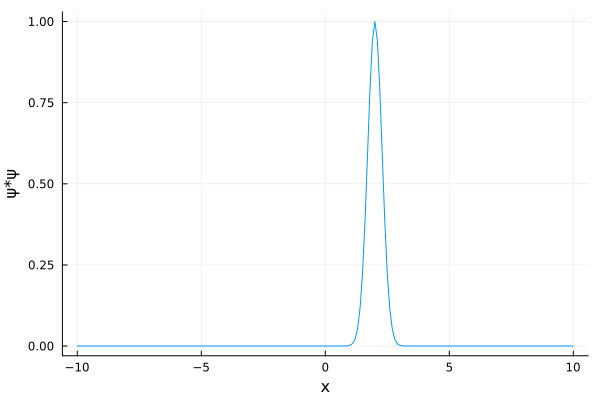

In [21]:
x=collect(-10:0.1:10)
wf=wavefunction.(x)
display(plot(x,abs.(wf.*conj(wf)),xlabel=("x"),ylabel=("ψ*ψ"),legend=false))                                 #Plot for wavefunction



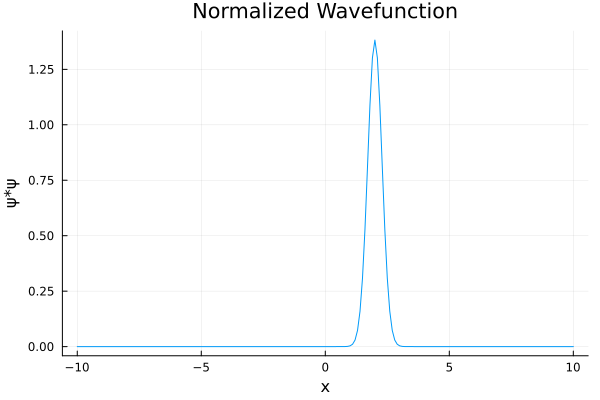

In [22]:
nwf=norm(wf,-10,10)                                    
display(plot(x,abs.(nwf.*conj(nwf)),title="Normalized Wavefunction",xlabel=("x"),ylabel=("ψ*ψ"),legend=false))                 #Plot of Normalized wavefunction


Function for coefficients of second derivative n-point formula

In [4]:
function coefficients(k)
    mat=zeros(k,k)
    for i in 1:k
        for j in 1:k
            mat[i,j]=2*(i)^(2*j)/factorial(2*j)
        end
    end
    Inv=inv(mat)
    
    C=zeros(1,k+1)
    C[1]=-2*sum(Inv[1,:])
    C[2:k+1]=Inv[1,1:end]
    return C
end






coefficients (generic function with 1 method)

In [23]:
for i in 1:7
    println("For r=",i," :",coefficients(i))
end

For r=1 :[-2.0 1.0]
For r=2 :[-2.5 1.3333333333333333 -0.08333333333333331]
For r=3 :[-2.7222222222222223 1.5 -0.15000000000000002 0.011111111111111127]
For r=4 :[-2.8472222222222374 1.6000000000000119 -0.2000000000000055 0.02539682539682675 -0.0017857142857144043]
For r=5 :[-2.9272222222222464 1.666666666666686 -0.2380952380952478 0.039682539682542595 -0.004960317460317942 0.0003174603174603552]
For r=6 :[-2.982777777777734 1.7142857142856807 -0.26785714285712814 0.05291005291005002 -0.00892857142857155 0.0010389610389611725 -6.012506012507274e-5]
For r=7 :[-3.0235941043058956 1.7499999999978435 -0.2916666666652785 0.06481481481415746 -0.013257575757352535 0.002121212121160565 -0.00022662522661798246 1.1892869035251205e-5]


Function for Pade Approximation 

In [24]:
function Pade(M)
    C = zeros(M,M)
    C0 = zeros(M,1)
    for i in 1:M
        C0[i,1] = -1/factorial(M+i)
        for j in 1:M
            C[i,j] = 1/factorial(M+i-j)
        end
    end
    B = inv(C)*C0
    
    poly = Polynomial([1;B], :z)
    root = roots(poly)
    root=-conj(root)
    return root
end


Pade (generic function with 1 method)

Pade roots for M upto 5

In [25]:
for i in 1:5
    println("For m=",i," :",Pade(i))
end

For m=1 :[-2.0]
For m=2 :ComplexF64[-3.0000000000000004 - 1.732050807568879im, -3.0000000000000004 + 1.732050807568879im]
For m=3 :ComplexF64[-3.677814645373922 - 3.508761919567434im, -3.677814645373922 + 3.508761919567434im, -4.644370709252179 + 0.0im]
For m=4 :ComplexF64[-4.207578794359186 - 5.314836083713234im, -4.207578794359186 + 5.314836083713234im, -5.792421205640878 - 1.7344682578691335im, -5.792421205640878 + 1.7344682578691335im]
For m=5 :ComplexF64[-4.6493486063642 - 7.142045840673156im, -4.6493486063642 + 7.142045840673156im, -6.703912798308792 - 3.4853228323737446im, -6.703912798308792 + 3.4853228323737446im, -7.2934771906495595 + 0.0im]


Time Evolution of the wavefunction

In [26]:
r=4
M=1
coeff=coefficients(r)
x=collect(-10:dx:10)
dx=0.1
dt=0.01
m=1
b=im*dt/(2*m*(dx^2))
V = zeros(1,length(x))
MAT=[]
for n in 1:M
    z1=Pade(M)[n]
    a=b*coeff /z1
    d=1.0+a[1]
    A=complex(zeros(length(x),length(x)))
    for i in 1:length(x)
        for j in 1:length(x)
            if i==j
                A[i,i]=d-im*dt*V[i]/(z1)
            elseif abs(i-j) < r+1
                A[i,j]=a[abs(i-j)+1]
            end
        end
    end
    push!(MAT,A) 
end
Final=1
for i in M
    Final*=MAT[i]
end
Inv_Final=inv(Final)
Conj_Final=conj(Final)


201×201 Matrix{ComplexF64}:
  1.0-0.711806im     -0.0+0.4im          …   0.0-0.0im
 -0.0+0.4im           1.0-0.711806im         0.0-0.0im
  0.0-0.05im         -0.0+0.4im              0.0-0.0im
 -0.0+0.00634921im    0.0-0.05im             0.0-0.0im
  0.0-0.000446429im  -0.0+0.00634921im       0.0-0.0im
  0.0-0.0im           0.0-0.000446429im  …   0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im          …   0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
     ⋮                                   ⋱      ⋮
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im          …   0.0-0.0im
  0.0-0.0im           0.0-0.0im              0.0-0.0im
  0.0-0.0im           0.0-0.0im           

In [27]:
nwf=norm(wavefunction.(x),-10,10)
N=500
wave=nwf
for n=1:N
    Psi_new=Inv_Final*Conj_Final*nwf                 #New wavefunction
    wave=hcat(wave,Psi_new) 
    nwf=Psi_new
end

[ Info: Saved animation to C:\Users\91865\Documents\Julia\PYL800\wave.gif


Plots.AnimatedGif("C:\\Users\\91865\\Documents\\Julia\\PYL800\\wave.gif")
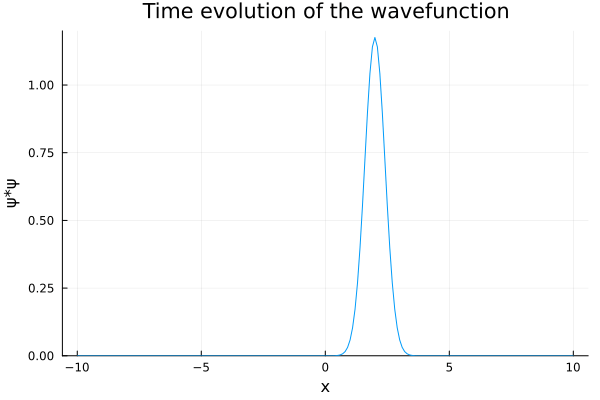

In [30]:
anim = @animate for i = 1:N                          #To animate wavefunction
    plot(x, abs.(wave[:,i]),ylim=(0,1.2),title="Time evolution of the wavefunction",xlabel=("x"),ylabel=("ψ*ψ"),legend=false)    
end
gif(anim, "wave.gif")

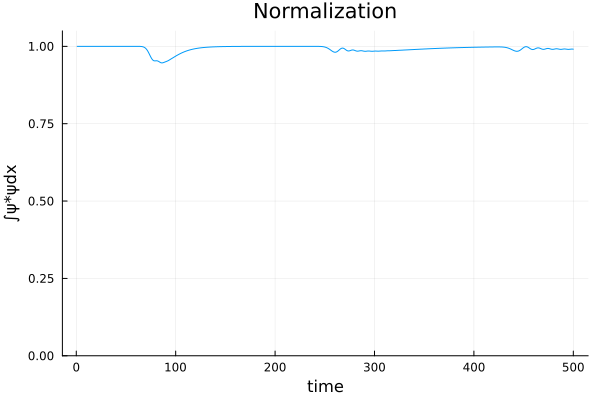

In [29]:
fx=[]
ho=[]
for i in 1:N
    fx=append!(fx,(integrate_(wave[:,i].*conj(wave[:,i]),-10,10)))
    ho=append!(ho,i)
end
plot(ho,fx,ylim=(0,1.05),title="Normalization",xlabel=("time"),ylabel=("∫ψ*ψdx"),legend=false)